# FACE RECOGNITION

Face recognition sử dụng phương pháp đặc trưng haar cascade có trong thư viện OpenCV để phát hiện khuôn mặt và thuật toán LBPH để training.

### **_1. Import các packages cần thiết_**

In [3]:
import numpy as np 
import urllib
import matplotlib.pyplot as plt
import cv2
import sys
from urllib.request import urlopen
import os.path

### ***2. Xây dựng hàm đọc file từ url***

In [4]:
def url2image(url):
    resp = urlopen(url) #lấy tài nguyên qua url lưu vào biến resp
    image = np.asarray(bytearray(resp.read()),dtype = 'uint8') #Chuyển tài nguyên ở biến resp thành mảng 1 chiều có giá trị là các số nguyên từ 0-255
    image = cv2.imdecode(image,cv2.IMREAD_COLOR) #Đọc hình từ biến image có định dạng ảnh màu BGR
    return image

### ***3. Download và load file haarcascade_frontalface***

In [5]:
face_classifier_xml = 'my_haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classifier_xml) #kiểm tra tồn tại file xml hay chưa?

if ret:#nếu có file xml thì báo already
    print('The cascade classifier xml file already existed\n') 
else:#nếu chưa thì download từ .....
    print('Downloadling the cascade classifier xml file from internet ...\n')
    face_classifier_url = 'https://raw.githubusercontent.com/shantnu/Webcam-Face-Detect/master/haarcascade_frontalface_default.xml'
    resp = urlopen(face_classifier_url)
    data = resp.read()
    
    fh = open(face_classifier_xml,"wb")
    fh.write(data)
    fh.close()
    resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml) #load file xml

The cascade classifier xml file already existed



### ***4.Input*** 

In [6]:
bgr_img = url2image('https://raw.githubusercontent.com/buiduongthuytien/GifHub/master/IMG_5331.png')
cv2.imwrite('IMG_5331.png',bgr_img)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY) #chuyển ảnh màu bgr thành ảnh xám

### ***5. Processing***

*Sử dụng hàm detectMultiScale để nhận diện khuôn mặt*

In [7]:
faces = face_cascade.detectMultiScale(gray_img,1.25,3) #Phát hiện các đối tượng có kích thước khác nhau trong hình ảnh đầu vào. Các đối tượng được phát hiện được trả về dưới dạng danh sách các hình chữ nhật.
for (x,y,w,h) in faces:
    cv2.rectangle(bgr_img,(x,y),(x+w,y+h), (255,0,0),4)

### ***6.Output***

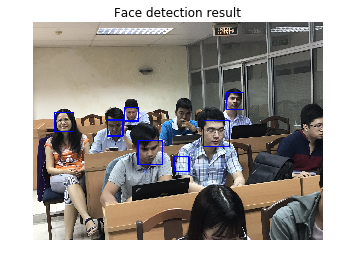

True

In [8]:
plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IMG_FDR.png',bgr_img)

![](IMG_FDR.png)

### ***7. Xây dựng class Cropper để cắt ảnh thêm vào từng thư mục riêng***

In [9]:
class FaceCropper(object):
    CASCADE_PATH = "my_haarcascade_frontalface_default.xml"

    def __init__(self):#Khi một thực thể (instance) của một class được tạo ra thì hàm này sẽ được thực thi đầu tiên và một cách tự động
        self.face_cascade = cv2.CascadeClassifier(self.CASCADE_PATH)

    def generate(self, image_path, show_result):#Hàm cắt gương mặt
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        
        faces = self.face_cascade.detectMultiScale(img, 1.25, 3)
        if (faces is None):
            print('Failed to detect face')
            return 0

        if (show_result):
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.destroyAllWindows()

        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)
        i = 0
        height, width = img.shape[:2]

        for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)

            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (150, 150))
            i += 1
            directory = "face"+str(i)
            if not os.path.exists(directory): #Nếu không tồn tại đường dẫn
                os.makedirs(directory)#Tạo đường dẫn
                cv2.imwrite("./face"+str(i)+"/"+"face"+str(i)+".jpg",lastimg)#Write hình xuống đường dẫn (/face1/face1.jpg)

### ***8. Thực hiện chạy demo***

In [10]:
detecter = FaceCropper()
detecter.generate('IMG_5331.png', True)

Detected faces: 7


![](Capture.PNG)

### ***9. Training***

### INPUT: Hình người cần nhận diện đặt trong thư mục training-data theo thứ tự thư mục tương ứng với danh sách nhãn dán trong phần processing
    
![](trainingdata.PNG)

### PROCESSING: Sử dụng thuật toán LBPH

Lets gather some data
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Training on image...
Total data to train:  36
predicting images...


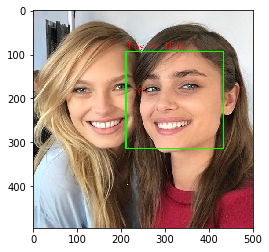

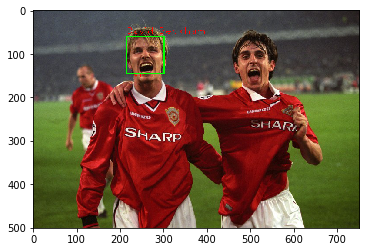

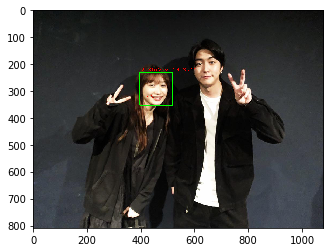

In [12]:
# list of labels 
subjects = ["", "Taylor Hill", "David Beckham", "Okamoto Natsumi"]
#Xây dựng hàm phát hiện khuôn mặt
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    face_cascade = cv2.CascadeClassifier('my_haarcascade_frontalface_default.xml')   
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    
    if (len(faces) == 0):
        return None, None
    
    # assumption --> only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    # face part of the image
    return gray[y:y+w, x:x+h], faces[0]
#Xây dựng hàm prepare_training_data
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)    
    faces = []
    labels = []  
    
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue;
            
        label = int(dir_name.replace("s", ""))
        subject_dir_path = data_folder_path + "/" + dir_name  
        subject_images_names = os.listdir(subject_dir_path)
        
    
        #detect face and add face to list of faces
        for image_name in subject_images_names:           

            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            
            #display images to train
            print("Training on image...")
            
            #detect face
            face, rect = detect_face(image)           
          
            # ignore all faces that are not detected
            if face is not None:
                faces.append(face)
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels
print("Lets gather some data")
faces, labels = prepare_training_data("training-data")
print("Total data to train: ", len(faces))
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#Bắt đầu training
face_recognizer.train(faces, np.array(labels))
w=0
h=0
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
def draw_text(img, text, x, y,confidence):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 255), int(1.5))    
    cv2.putText(img, str(confidence), (x+w,y+h+100), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)


def predict(test_img):    
    face, rect = detect_face(test_img)
    label, confidence = face_recognizer.predict(face)
    ## calculating accuracy 
    if (confidence < 100):
        label = subjects[label]
        confidence = "  {0}%".format((round(confidence)))
        
    else:
        label = subjects[label]
        confidence = "  {0}%".format(abs(round(100 - confidence)))
        
#get name of respective label returned by face recognizer
    
    draw_text(test_img, label, rect[0], rect[1]-5,confidence)
    draw_rectangle(test_img, rect)    
    return test_img


print("predicting images...")
#load test images
test_img1 = cv2.imread("test-data/taylor_hill.jpg")
test_img2 = cv2.imread("test-data/dbeck.jpg")
test_img3 = cv2.imread("test-data/okamoto-natsumi.jpg")
#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
predicted_img3 = predict(test_img3)

#Write ảnh đã dự đoán ra file .jpg và hiển thị trên console
cv2.imwrite('predicted_img1.jpg',predicted_img1)
plt.imshow(cv2.cvtColor(predicted_img1,cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('predicted_img2.jpg',predicted_img2)
plt.imshow(cv2.cvtColor(predicted_img2,cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('predicted_img3.jpg',predicted_img3)
plt.imshow(cv2.cvtColor(predicted_img3,cv2.COLOR_BGR2RGB))
plt.show()

### **OUTPUT:** KẾT QUẢ THU ĐƯỢC
![](predicted_img1.jpg)
![](predicted_img2.jpg)
![](predicted_img3.jpg)

### ***9. Tham khảo***

[1] https://gist.github.com/tilfin/98bbba47fdc4ac10c4069cce5fabd834 truy cập ngày: 30/05/2019 <br>
[2] Anchit Jain, Face recognition — OpenCV, https://medium.com/data-science-101/face-recognition-opencv-e841dc0006c6 truy cập ngày: 30/05/2019